<a href="https://colab.research.google.com/github/Jeetkavaiya/Prasunet-Internship-Tasks/blob/main/Food_Items_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:12<00:00, 31.2MB/s]
100% 1.98G/1.98G [01:12<00:00, 29.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preprocessing

### Training Image Processing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


### Validation Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


## Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

## Compiling and Training

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 74s 635ms/step - loss: 6.6938 - accuracy: 0.0276 - val_loss: 3.5827 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 66s 615ms/step - loss: 3.5805 - accuracy: 0.0302 - val_loss: 3.5771 - val_accuracy: 0.0285
Epoch 3/32
98/98 [==============================] - 65s 615ms/step - loss: 3.5741 - accuracy: 0.0372 - val_loss: 3.5644 - val_accuracy: 0.0399
Epoch 4/32
98/98 [==============================] - 65s 622ms/step - loss: 3.5597 - accuracy: 0.0353 - val_loss: 3.5177 - val_accuracy: 0.0627
Epoch 5/32
98/98 [==============================] - 65s 611ms/step - loss: 3.5456 - accuracy: 0.0440 - val_loss: 3.4979 - val_accuracy: 0.0627
Epoch 6/32
98/98 [==============================] - 65s 621ms/step - loss: 3.5289 - accuracy: 0.0485 - val_loss: 3.4178 - val_accuracy: 0.0855
Epoch 7/32
98/98 [==============================] - 65s 626ms/step - loss: 3.5116 - accuracy: 0.0559 - val_loss: 3.3905 - val_accuracy: 0.0940

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 55s 516ms/step - loss: 1.2344 - accuracy: 0.6831
Training accuracy: 0.683146059513092


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 9s 143ms/step - loss: 1.3187 - accuracy: 0.6923
Validation accuracy: 0.692307710647583


## Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history

{'loss': [6.693798065185547,
  3.5804686546325684,
  3.574070453643799,
  3.559678792953491,
  3.545645236968994,
  3.528852701187134,
  3.5115702152252197,
  3.5206499099731445,
  3.4998996257781982,
  3.4684383869171143,
  3.4990792274475098,
  3.4453794956207275,
  3.4140496253967285,
  3.3689305782318115,
  3.3086345195770264,
  3.22369122505188,
  3.101206064224243,
  3.0437216758728027,
  2.905341148376465,
  2.859853506088257,
  2.7218778133392334,
  2.610278606414795,
  2.509321689605713,
  2.4124670028686523,
  2.307110548019409,
  2.2495486736297607,
  2.09323787689209,
  2.0353660583496094,
  1.950342059135437,
  1.8867758512496948,
  1.9334304332733154,
  1.7456194162368774],
 'accuracy': [0.027608346194028854,
  0.030176565051078796,
  0.03723916411399841,
  0.03531300276517868,
  0.04398074001073837,
  0.04847512021660805,
  0.05585874617099762,
  0.05393258482217789,
  0.06356340646743774,
  0.06645264476537704,
  0.06260032206773758,
  0.06805778294801712,
  0.080256819

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 69.2307710647583 %


##Accuracy Visualization

###Training Visualization

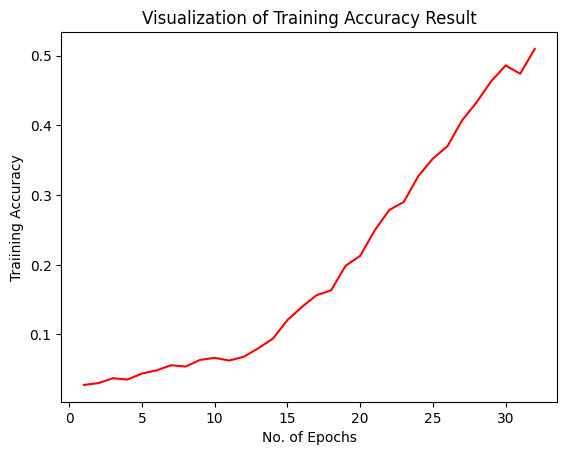

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy

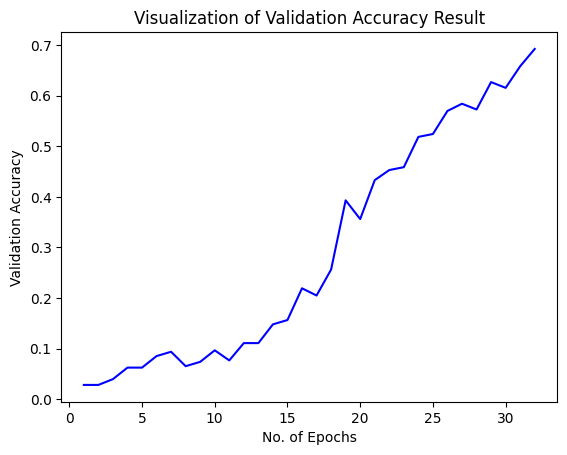

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Test set evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 9s 187ms/step - loss: 1.3181 - accuracy: 0.6964
Test accuracy: 0.6963788270950317
